In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the Dataset
df = pd.read_csv("Time_Data_All_P1_to_P10.csv")
df.head()


,Person,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,P1,16.62,19.71,21.68,28.19,32.42,34.65
1,P1,15.06,17.90,27.11,35.31,41.79,52.73
2,P1,17.23,20.51,29.36,36.71,40.10,46.03
3,P1,14.37,16.60,24.14,34.91,37.21,45.40
4,P1,15.05,19.08,23.28,27.12,33.77,37.78


In [3]:
# Melt the data to create a long-form dataframe
melted_df = pd.melt(df, id_vars=['Person'], 
                    value_vars=['Time_2', 'Time_3', 'Time_4', 'Time_5'],
                    var_name='Ball_Count', value_name='Time_Taken')

# Convert Ball_Count to numeric (extract number from "Time_2", etc.)
melted_df['Ball_Count'] = melted_df['Ball_Count'].str.extract('(\d)').astype(int)

# Preview
melted_df.head()

,Person,Ball_Count,Time_Taken
0,P1,2,16.62
1,P1,2,15.06
2,P1,2,17.23
3,P1,2,14.37
4,P1,2,15.05


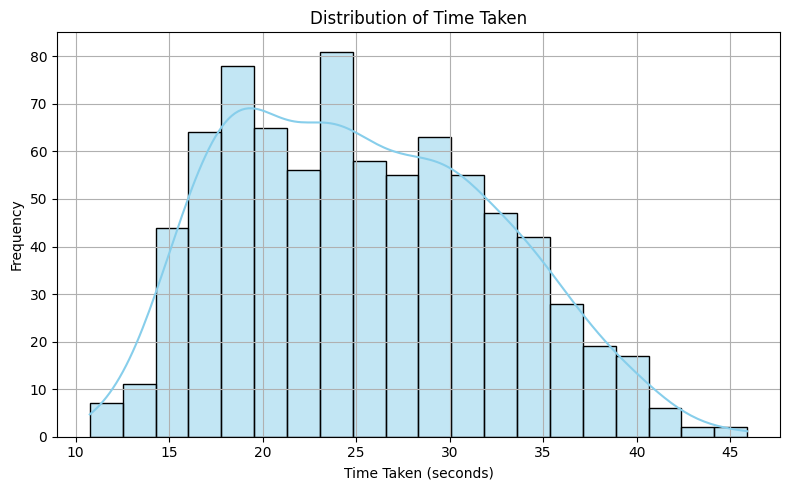

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(melted_df['Time_Taken'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

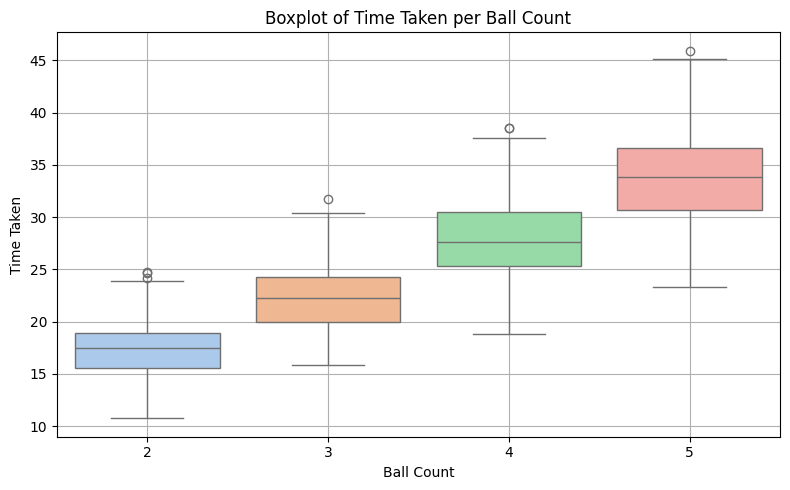

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=melted_df, x='Ball_Count', y='Time_Taken', palette='pastel')
plt.title("Boxplot of Time Taken per Ball Count")
plt.xlabel("Ball Count")
plt.ylabel("Time Taken")
plt.grid(True)
plt.tight_layout()
plt.show()

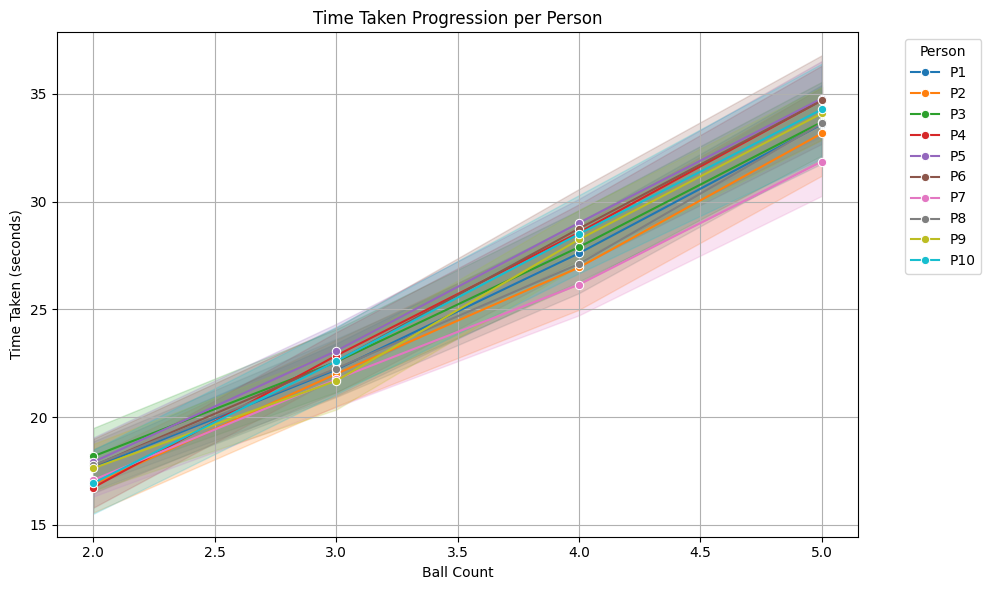

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='Ball_Count', y='Time_Taken', hue='Person', marker='o')
plt.title("Time Taken Progression per Person")
plt.xlabel("Ball Count")
plt.ylabel("Time Taken (seconds)")
plt.legend(title="Person", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

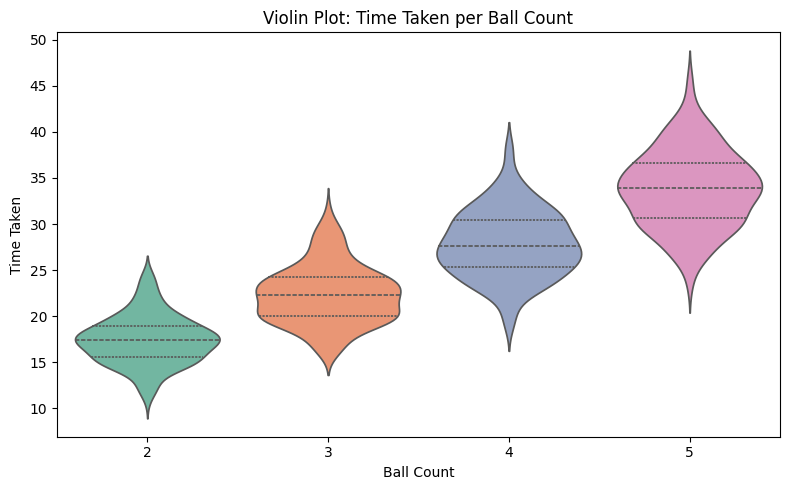

In [7]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=melted_df, x='Ball_Count', y='Time_Taken', inner='quartile', palette='Set2')
plt.title("Violin Plot: Time Taken per Ball Count")
plt.xlabel("Ball Count")
plt.ylabel("Time Taken")
plt.tight_layout()
plt.show()

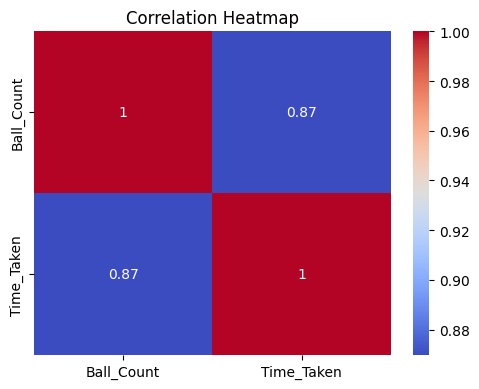

In [8]:
plt.figure(figsize=(5, 4))
sns.heatmap(melted_df[['Ball_Count', 'Time_Taken']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


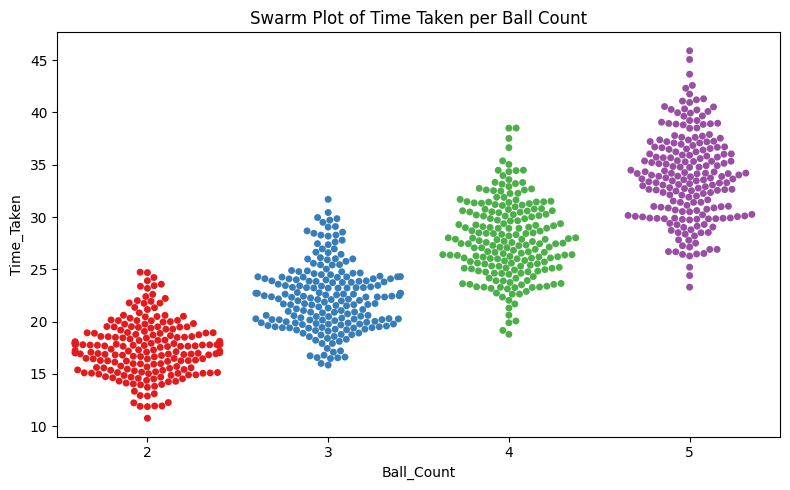

In [9]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=melted_df, x='Ball_Count', y='Time_Taken', palette='Set1')
plt.title("Swarm Plot of Time Taken per Ball Count")
plt.tight_layout()
plt.show()


In [10]:
#kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fit KMeans on Ball_Count and Time_Taken
kmeans = KMeans(n_clusters=3, random_state=42)
melted_df['KMeans_Label'] = kmeans.fit_predict(melted_df[['Ball_Count', 'Time_Taken']])

# Evaluation metrics
sil_score = silhouette_score(melted_df[['Ball_Count', 'Time_Taken']], melted_df['KMeans_Label'])
db_score = davies_bouldin_score(melted_df[['Ball_Count', 'Time_Taken']], melted_df['KMeans_Label'])

print(f"\nkmeans clustering Results:")
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.2f}")



kmeans clustering Results:
Silhouette Score: 0.55
Davies-Bouldin Score: 0.56


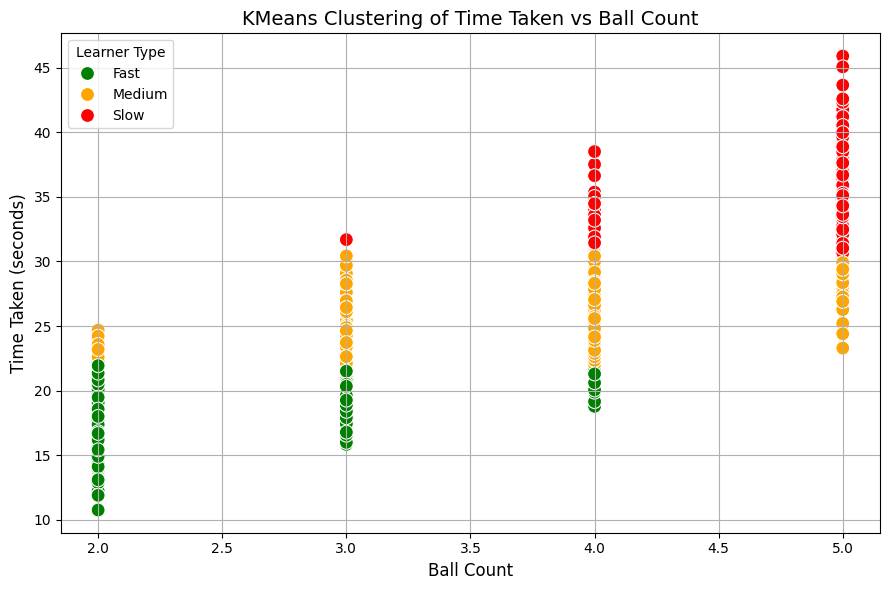

In [11]:
# Calculate mean time per cluster
cluster_means = melted_df.groupby('KMeans_Label')['Time_Taken'].mean().sort_values()

# Create mapping based on mean times
cluster_mapping = {cluster: label for cluster, label in zip(cluster_means.index, ['Fast', 'Medium', 'Slow'])}

# Map labels in the dataset
melted_df['Learner_Type'] = melted_df['KMeans_Label'].map(cluster_mapping)

# Custom color palette
custom_palette = {'Fast': 'green', 'Medium': 'orange', 'Slow': 'red'}

# Improved scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(data=melted_df, x="Ball_Count", y="Time_Taken", hue="Learner_Type", palette=custom_palette, s=100)
plt.title("KMeans Clustering of Time Taken vs Ball Count", fontsize=14)
plt.xlabel("Ball Count", fontsize=12)
plt.ylabel("Time Taken (seconds)", fontsize=12)
plt.legend(title="Learner Type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Step 2: Fit Agglomerative Clustering
X = melted_df[['Ball_Count', 'Time_Taken']]
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
melted_df['Agglo_Label'] = agglo.fit_predict(X)

In [13]:
# Evaluation metrics
sil_score = silhouette_score(X, melted_df['Agglo_Label'])
db_score = davies_bouldin_score(X, melted_df['Agglo_Label'])
print(f"\nAgglomerative Clustering Results:")
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.2f}")


Agglomerative Clustering Results:
Silhouette Score: 0.49
Davies-Bouldin Score: 0.56


In [14]:
# Map cluster labels to Fast/Medium/Slow based on avg time
cluster_avg = melted_df.groupby('Agglo_Label')['Time_Taken'].mean().sort_values()
mapping = {label: name for label, name in zip(cluster_avg.index, ['Fast', 'Medium', 'Slow'])}
melted_df['Agglo_Learner_Type'] = melted_df['Agglo_Label'].map(mapping)


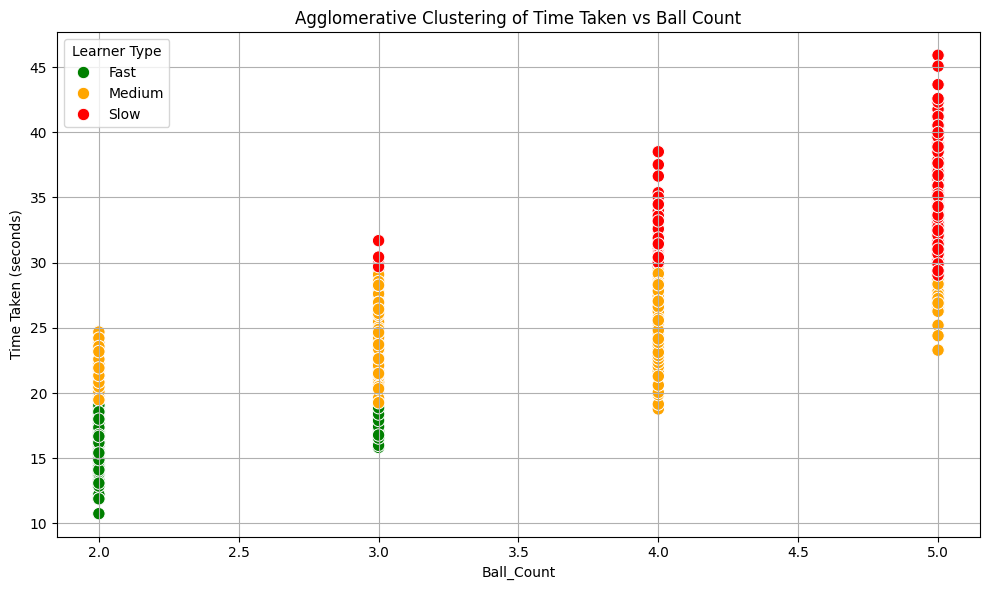

In [15]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='Ball_Count', y='Time_Taken', hue='Agglo_Learner_Type',
                palette={'Fast': 'green', 'Medium': 'orange', 'Slow': 'red'}, s=80)
plt.title("Agglomerative Clustering of Time Taken vs Ball Count")
plt.ylabel("Time Taken (seconds)")
plt.legend(title="Learner Type")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Fit GMM Model
X = melted_df[['Ball_Count', 'Time_Taken']]
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
melted_df['GMM_Label'] = gmm_labels

In [17]:
# Evaluate GMM
from sklearn.metrics import silhouette_score, davies_bouldin_score

gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_db = davies_bouldin_score(X, gmm_labels)

print("\nGaussian Mixture Model (GMM) Results:")
print(f"Silhouette Score: {gmm_silhouette:.2f}")
print(f"Davies-Bouldin Score: {gmm_db:.2f}")


Gaussian Mixture Model (GMM) Results:
Silhouette Score: 0.40
Davies-Bouldin Score: 0.79


In [18]:
# Map cluster to average time
gmm_centroids = melted_df.groupby('GMM_Label')['Time_Taken'].mean().sort_values()
gmm_cluster_map = {label: idx for idx, label in enumerate(gmm_centroids.index)}
melted_df['GMM_Label_Sorted'] = melted_df['GMM_Label'].map(gmm_cluster_map)

# Assign learner type based on timing
gmm_learner_type_map = {0: 'Fast', 1: 'Medium', 2: 'Slow'}
melted_df['GMM_Learner'] = melted_df['GMM_Label_Sorted'].map(gmm_learner_type_map)


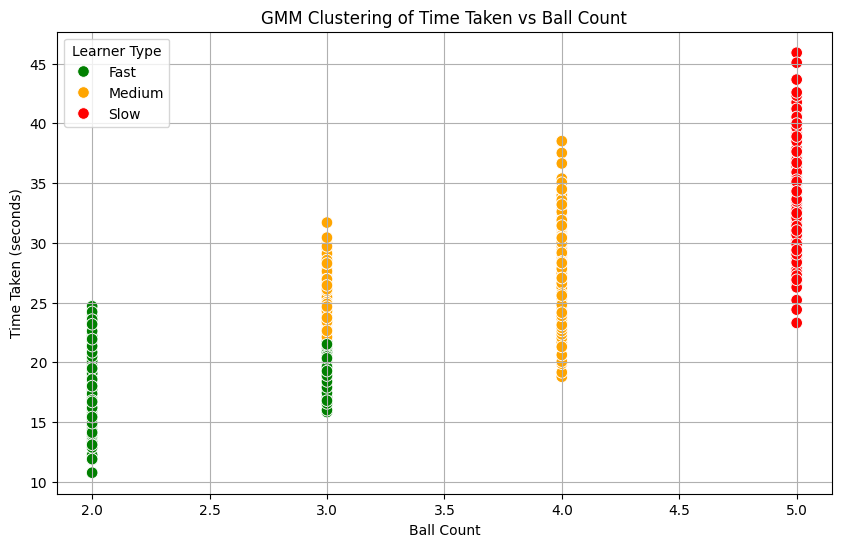

In [19]:
# Define colors
gmm_color_map = {'Fast': 'green', 'Medium': 'orange', 'Slow': 'red'}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=melted_df,
    x='Ball_Count', y='Time_Taken',
    hue='GMM_Learner',
    palette=gmm_color_map,
    s=70
)

plt.title("GMM Clustering of Time Taken vs Ball Count")
plt.xlabel("Ball Count")
plt.ylabel("Time Taken (seconds)")
plt.legend(title="Learner Type")
plt.grid(True)
plt.show()


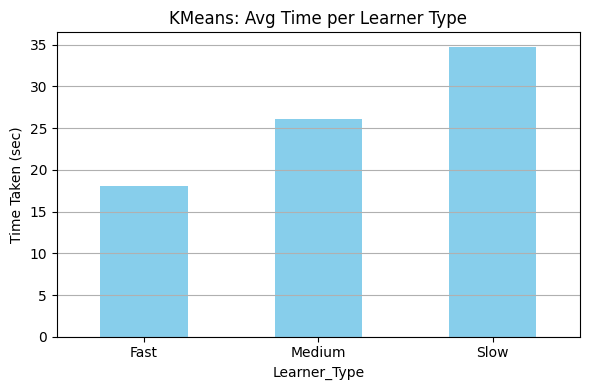

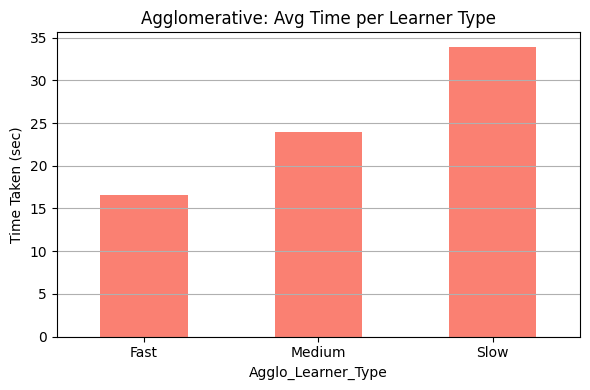

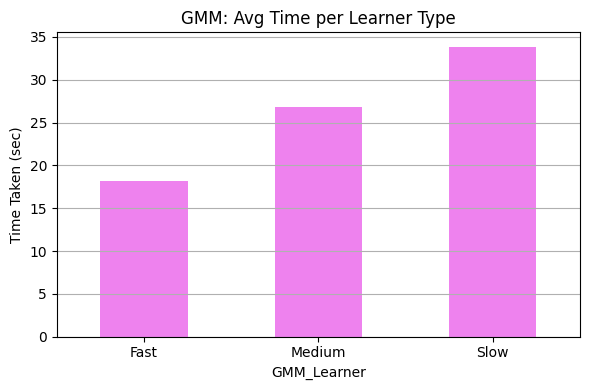

In [20]:
# Bar Plot: Average Time Taken by Learner Type for KMeans
plt.figure(figsize=(6, 4))
melted_df.groupby('Learner_Type')['Time_Taken'].mean().loc[['Fast', 'Medium', 'Slow']].plot(kind='bar', color='skyblue')
plt.title("KMeans: Avg Time per Learner Type")
plt.ylabel("Time Taken (sec)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Plot: Average Time Taken by Learner Type for Agglomerative
plt.figure(figsize=(6, 4))
melted_df.groupby('Agglo_Learner_Type')['Time_Taken'].mean().loc[['Fast', 'Medium', 'Slow']].plot(kind='bar', color='salmon')
plt.title("Agglomerative: Avg Time per Learner Type")
plt.ylabel("Time Taken (sec)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Plot: Average Time Taken by Learner Type for GMM
plt.figure(figsize=(6, 4))
melted_df.groupby('GMM_Learner')['Time_Taken'].mean().loc[['Fast', 'Medium', 'Slow']].plot(kind='bar', color='violet')
plt.title("GMM: Avg Time per Learner Type")
plt.ylabel("Time Taken (sec)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


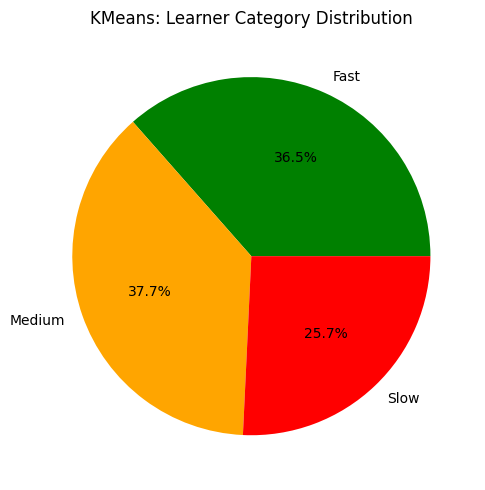

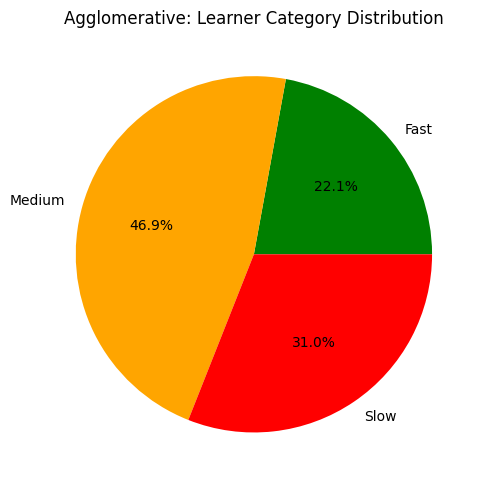

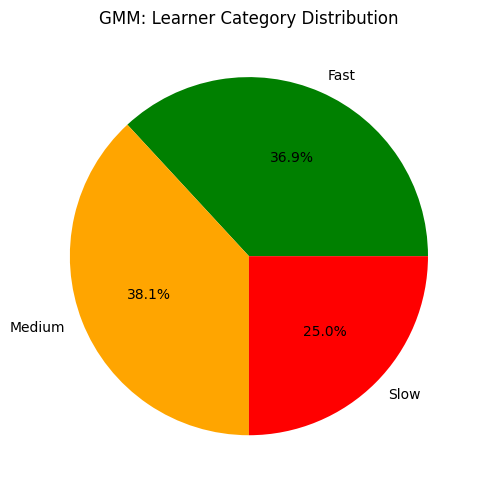

In [21]:
# Pie Chart: KMeans Learner Distribution
plt.figure(figsize=(5, 5))
melted_df['Learner_Type'].value_counts().loc[['Fast', 'Medium', 'Slow']].plot.pie(autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("KMeans: Learner Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Pie Chart: Agglomerative Learner Distribution
plt.figure(figsize=(5, 5))
melted_df['Agglo_Learner_Type'].value_counts().loc[['Fast', 'Medium', 'Slow']].plot.pie(autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Agglomerative: Learner Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Pie Chart: GMM Learner Distribution
plt.figure(figsize=(5, 5))
melted_df['GMM_Learner'].value_counts().loc[['Fast', 'Medium', 'Slow']].plot.pie(autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("GMM: Learner Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Scores from your models
comparison_data = {
    "Model": ["KMeans", "Agglomerative", "GMM"],
    "Silhouette Score": [0.55, 0.49, 0.40],
    "Davies-Bouldin Score": [0.56, 0.56, 0.79],
    "Interpretability": ["Easy", "Moderate", "Advanced"]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Normalize Silhouette and DB scores for fair ranking
comparison_df["Silhouette Rank"] = comparison_df["Silhouette Score"].rank(ascending=False)
comparison_df["DB Rank"] = comparison_df["Davies-Bouldin Score"].rank(ascending=True)

# Sum of both ranks (lower is better)
comparison_df["Overall Score"] = comparison_df["Silhouette Rank"] + comparison_df["DB Rank"]

# Identify best model (lowest overall score)
min_score = comparison_df["Overall Score"].min()
comparison_df["Best Model"] = comparison_df["Overall Score"] == min_score
comparison_df["Best Model"] = comparison_df["Best Model"].map({True: "Best", False: "Not best"})

# Drop ranking columns (optional)
comparison_df.drop(columns=["Silhouette Rank", "DB Rank", "Overall Score"], inplace=True)

# Display
print("\nCross-Model Comparison Table:")
display(comparison_df)



Cross-Model Comparison Table:


,Model,Silhouette Score,Davies-Bouldin Score,Interpretability,Best Model
0,KMeans,0.55,0.56,Easy,Best
1,Agglomerative,0.49,0.56,Moderate,Not best
2,GMM,0.40,0.79,Advanced,Not best
